## Model Training

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("sleep_cycle_productivity_preprocessed.csv")

In [3]:
X = df.drop("Sleep Quality", axis=1)
y = df["Sleep Quality"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest 1

In [5]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = clf.predict(X_test)

In [19]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.109

Confusion Matrix:
 [[ 2  7  1 15 20  8  7  6  5 15]
 [ 0  8  2 16 18 12  8 10  7 18]
 [ 2  6  2 23 20  8 11 13  5 14]
 [ 1  3  2 21 22  3 13 10  3 15]
 [ 4 11  2 16 24  4 14 10  1 13]
 [ 3  7  2 26 16  7 12  8  4 14]
 [ 2 11  1 22 16  7  7 13  4 22]
 [ 1  8  6 17 24  2  6 15  5 14]
 [ 3 14  1 22 22  5 10  7  7 17]
 [ 1  6  4 25 21  6 12 11  7 16]]

Classification Report:
               precision    recall  f1-score   support

           1       0.11      0.02      0.04        86
           2       0.10      0.08      0.09        99
           3       0.09      0.02      0.03       104
           4       0.10      0.23      0.14        93
           5       0.12      0.24      0.16        99
           6       0.11      0.07      0.09        99
           7       0.07      0.07      0.07       105
           8       0.15      0.15      0.15        98
           9       0.15      0.06      0.09       108
          10       0.10      0.15      0.12       109

    ac

## Random Forest 2

In [20]:
def simplify_sleep_quality(x):
    if x <= 3:
        return 0  # Low
    elif x <= 7:
        return 1  # Medium
    else:
        return 2  # High

df["Sleep Quality"] = df["Sleep Quality"].apply(simplify_sleep_quality)

In [21]:
X = df.drop("Sleep Quality", axis=1)
y = df["Sleep Quality"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

Accuracy Score: 0.375

Confusion Matrix:
 [[ 51 202  36]
 [ 72 277  47]
 [ 53 215  47]]

Classification Report:
               precision    recall  f1-score   support

         Low       0.29      0.18      0.22       289
      Medium       0.40      0.70      0.51       396
        High       0.36      0.15      0.21       315

    accuracy                           0.38      1000
   macro avg       0.35      0.34      0.31      1000
weighted avg       0.36      0.38      0.33      1000



## Random Forest 3

In [25]:
clf = RandomForestClassifier(random_state=42, class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [26]:
y_pred = clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

Accuracy Score: 0.384

Confusion Matrix:
 [[ 51 204  34]
 [ 56 287  53]
 [ 58 211  46]]

Classification Report:
               precision    recall  f1-score   support

         Low       0.31      0.18      0.22       289
      Medium       0.41      0.72      0.52       396
        High       0.35      0.15      0.21       315

    accuracy                           0.38      1000
   macro avg       0.35      0.35      0.32      1000
weighted avg       0.36      0.38      0.34      1000



In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=True)

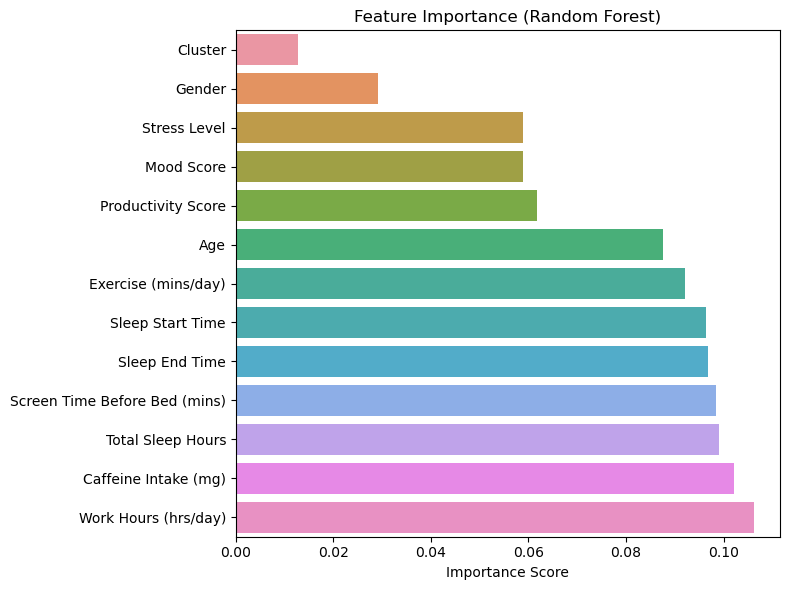

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

## Random Forest 4

In [34]:
from sklearn.model_selection import GridSearchCV

In [31]:
top_features = [
    "Work Hours (hrs/day)",
    "Caffeine Intake (mg)",
    "Total Sleep Hours",
    "Screen Time Before Bed (mins)",
    "Sleep End Time",
    "Sleep Start Time",
    "Exercise (mins/day)"
]
X = df[top_features]
y = df["Sleep Quality"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
}
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [36]:
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

In [37]:
print("Best Params:", grid.best_params_)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Score: 0.36

Confusion Matrix:
 [[ 60 181  48]
 [ 86 244  66]
 [ 57 202  56]]

Classification Report:
               precision    recall  f1-score   support

         Low       0.30      0.21      0.24       289
      Medium       0.39      0.62      0.48       396
        High       0.33      0.18      0.23       315

    accuracy                           0.36      1000
   macro avg       0.34      0.33      0.32      1000
weighted avg       0.34      0.36      0.33      1000



## Logistic Regression 1

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logreg = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [10]:
y_pred = logreg.predict(X_test)

In [11]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.109

Confusion Matrix:
 [[ 2  7  1 15 20  8  7  6  5 15]
 [ 0  8  2 16 18 12  8 10  7 18]
 [ 2  6  2 23 20  8 11 13  5 14]
 [ 1  3  2 21 22  3 13 10  3 15]
 [ 4 11  2 16 24  4 14 10  1 13]
 [ 3  7  2 26 16  7 12  8  4 14]
 [ 2 11  1 22 16  7  7 13  4 22]
 [ 1  8  6 17 24  2  6 15  5 14]
 [ 3 14  1 22 22  5 10  7  7 17]
 [ 1  6  4 25 21  6 12 11  7 16]]

Classification Report:
               precision    recall  f1-score   support

           1       0.11      0.02      0.04        86
           2       0.10      0.08      0.09        99
           3       0.09      0.02      0.03       104
           4       0.10      0.23      0.14        93
           5       0.12      0.24      0.16        99
           6       0.11      0.07      0.09        99
           7       0.07      0.07      0.07       105
           8       0.15      0.15      0.15        98
           9       0.15      0.06      0.09       108
          10       0.10      0.15      0.12       109

    ac

## Logistic Regression 2

In [38]:
param_grid = {
    "C": [0.01, 0.1, 1, 10], 
    "penalty": ["l2"],
    "solver": ["lbfgs", "saga"]
}


In [39]:
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', class_weight="balanced", random_state=42)
grid = GridSearchCV(logreg, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000,
                                          multi_class='multinomial',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'saga']},
             scoring='accuracy')

In [40]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [41]:
print("Best Parameters:", grid.best_params_)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy Score: 0.32

Confusion Matrix:
 [[ 91 123  75]
 [163 149  84]
 [118 117  80]]

Classification Report:
               precision    recall  f1-score   support

         Low       0.24      0.31      0.28       289
      Medium       0.38      0.38      0.38       396
        High       0.33      0.25      0.29       315

    accuracy                           0.32      1000
   macro avg       0.32      0.32      0.31      1000
weighted avg       0.33      0.32      0.32      1000



## K-Means Clustering

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
X = df.drop("Sleep Quality", axis=1)

In [15]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

In [16]:
df["Cluster"] = clusters

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

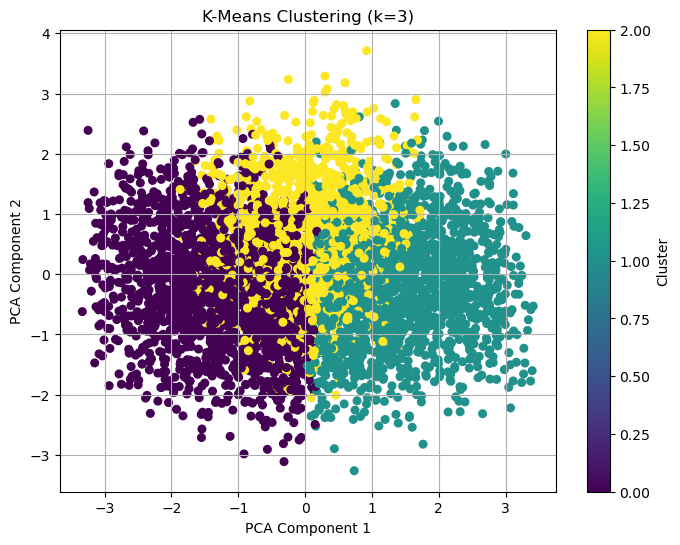

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=30)
plt.title("K-Means Clustering (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()